In [1]:
############################################################
############  LIBRERIAS
############
############################################################
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, utils, tree
import pyreadr
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

############################################################
############  BASE DE DATOS
############
############################################################
# BASE DE DATOS
## Como la base está en un archivo RData, se utiliza el paquete de pyreadr para poder leerlo en Python.

result = pyreadr.read_r("C:/Users/mespinoza/Documents/SAExML/data/pobreza/base.Rdata")
print(result.keys())
base = result["base"]
## Ahora se crea la base de datos de entrenamiento y de prueba
## Revisamos que la base de datos esté completa
base.head()
list(base.columns)

############################################################
############  ENTRENAMIENTO/PRUEBA
############
############################################################
X = base.drop(base.columns[5], axis=1)
y = base.iloc[:, 5]
list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state= 25)
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
print(utils.multiclass.type_of_target(y_train))

############################################################
############  MODELO
############
############################################################
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


odict_keys(['base'])
binary


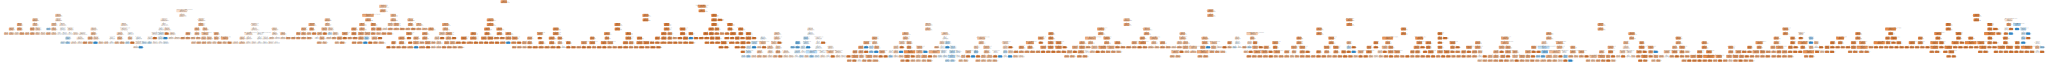

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                filled=True, rounded=True,
                                feature_names= list(X.columns),
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph